# Assignment 2

# Part 2: Classic recognition

Questions 2–7 are coding questions. You will implement different image representations and train linear classifiers with them. You will start with more flexible image representations and progressively move onto more rigid representations. Questions 8-10 are written questions to be answered in the PDF. You will report and reflect on the results, analyze the pros/cons of each representation and discuss possible improvements. 

In [2]:
%load_ext autoreload
%autoreload 2
### ↑ add these two lines so the updates in .py files are reflected 
###   to the notebook without needing to restart the kernel

import os, pickle
import numpy as np
import cv2
import matplotlib.pyplot as plt

from utils import get_CIFAR10_data, train, evaluate

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Setup

#### We provide you with a linear (softmax) classifier, as well as code to load the CIFAR-10 dataset.

The CIFAR-10 dataset consists of 60,000 32x32 colour images in 10 classes, with 6,000 images per class. There are 50,000 training images and 10,000 test images. See the dataset website for more details: https://www.cs.toronto.edu/~kriz/cifar.html.

**Do this:** Download the dataset from this link (https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz), place it where you want, and unzip it. Then try running the below code to see if you can load the dataset. Change `cifar10_dir` to your data path.

In [3]:
meta = pickle.load(open('data/cifar-10-batches-py/batches.meta', 'rb'), encoding='bytes')
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data(cifar10_dir='data/cifar-10-batches-py',
                                                                  num_training=4500, 
                                                                  num_validation=500, 
                                                                  num_test=1000)

Train data shape:  (4500, 32, 32, 3)
Train labels shape:  (4500,)
Validation data shape:  (500, 32, 32, 3)
Validation labels shape:  (500,)
Test data shape:  (1000, 32, 32, 3)
Test labels shape:  (1000,)


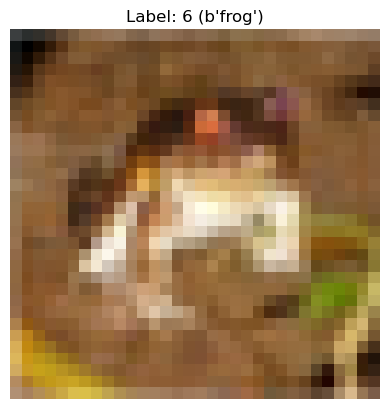

In [4]:
# Visualize a sample image
i = 0
label = y_train[i]
class_name = meta[b'label_names'][label]
plt.imshow(np.uint8(X_train[i])); plt.axis('off')
plt.title('Label: {} ({})'.format(label, class_name)); plt.show()

## Question 2. Color features (5 points)

First, we are going to explore using average color features to train a classifier. For each RGB color channel, average the pixel intensities. So a 32x32x3 image will be represented in a 1x3 vector.

**Do this:** Implement the `load_average_color_with_bias()` in `assn2.py` that computes average color features. Then train a classifier. Tune the regularization strength to train a good classifier.

In [ ]:
# Freshly load the data
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data(cifar10_dir='data/cifar-10-batches-py',
                                                                  num_training=4500, 
                                                                  num_validation=500, 
                                                                  num_test=1000)

In [ ]:
from assn2 import load_average_color_with_bias

X_train = load_average_color_with_bias(X_train)
X_val = load_average_color_with_bias(X_val)
X_test = load_average_color_with_bias(X_test)

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

In [ ]:
# TODO : Define regularization strengths. Put multiple values, more than 5,
#        See which regularization strength gives the best validation accuracy. 
regularization_strengths = [0.001]

# Train a classifier
best_color = train(X_train, y_train, X_val, y_val, X_test, y_test, regularization_strengths)

## Question 3. Bag of SIFT features (15 points)

Bag of words models are a popular technique for image classification inspired by models used in natural language processing. The model ignores or downplays word arrangement (spatial information in the image) and classifies based on a histogram of the frequency of visual words. The visual word "vocabulary" is established by clustering a large corpus of local features. In this question, you will extract SIFT features from the training images. These result in a Nx128 dimensional matrix where N is the number of keypoints. After extracting SIFT features from all training images, we can use the K-means clustering algorithm to cluster these features into K clusters each represented by a 128-dimensional centroid. Now we have a bag of visual words (clusters) and can represent each image as a histogram of SIFT features assigned to these clusters. Specifically, each image will be represented as a K-dimensional histogram. Using these representations, you can train a classifier as before.

**Do this**: Extract SIFT features. Do K-means clustering of the training images' SIFT features. Construct a histogram representation of the images and train a classifier. Specifically, implement `extract_sift()` in `features.py` and `load_flatten()` in `assn2.py`.

#### Example for extracting SIFT features

Check out OpenCV's tutorial on extracting SIFT features: https://docs.opencv.org/3.4/da/df5/tutorial_py_sift_intro.html.

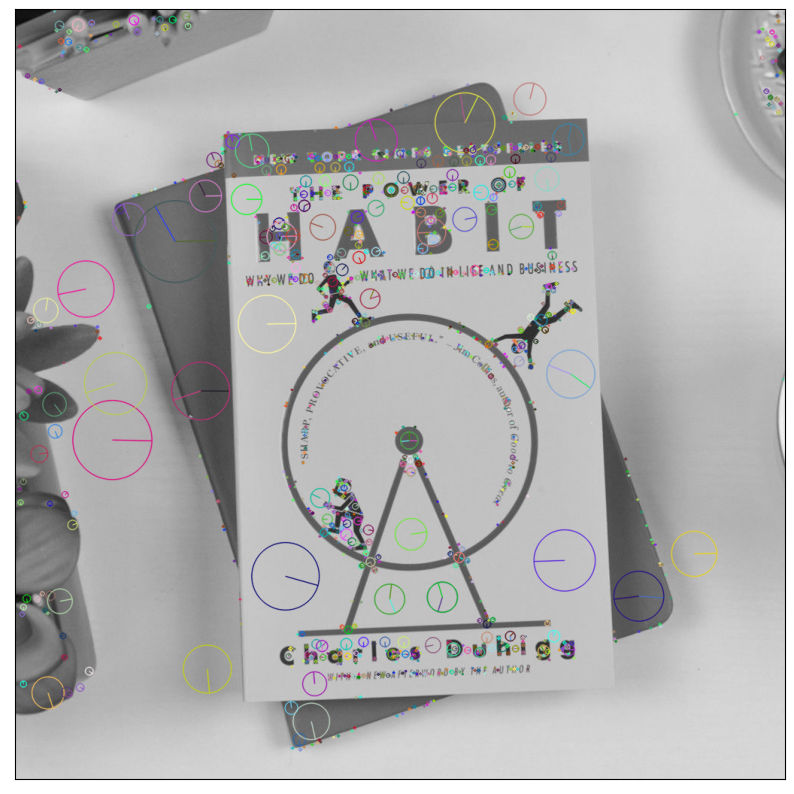

In [5]:
# Read in the image
img = cv2.imread('imgs/table.jpeg')

# Convert to greyscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Create a SIFT feature extractor
sift = cv2.SIFT_create() # or cv2.xfeatures2d.SIFT_create()

# Detect features from the image
keypoints, descriptors = sift.detectAndCompute(gray, None)

# Draw and visualize the detected keypoints on the image
sift_image = cv2.drawKeypoints(gray, keypoints, img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize=(10, 10))
plt.imshow(sift_image)
plt.xticks([]), plt.yticks([])
plt.show()

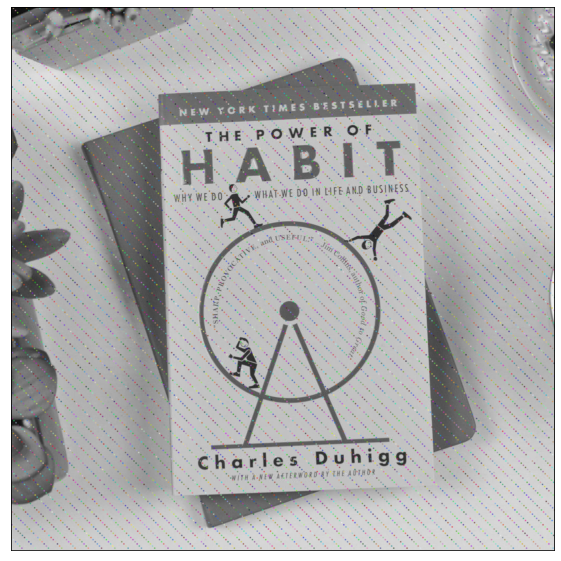

In [278]:
#s_gray --> img
step_size = 100
# descriptors = np.zeros(
#         (int(s_gray.shape[0] / step_size) * int(s_gray.shape[1] / step_size), 128)
#     )
mask = np.zeros((s_gray.size),dtype=int)
valid_pixels = np.arange(0, s_gray.size, step_size)

mask[valid_pixels] = 1
# key_point_bool = mask.reshape(s_gray.shape)
xs, ys = np.where(mask.reshape(s_gray.shape) == 1)

keypoints = []
for x,y in zip(xs,ys):
    keypoints.append(cv2.KeyPoint(float(x), float(y), size=1))

sift = cv2.SIFT_create()

_, descriptors = sift.compute(s_gray, keypoints)


sift_image = cv2.drawKeypoints(gray, keypoints, img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize=(10, 10))
plt.imshow(sift_image)
plt.xticks([]), plt.yticks([])
plt.show()

In [292]:
from features import extract_sift

img = cv2.imread('imgs/table.jpeg')

# Convert to greyscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

descriptors = extract_sift(gray, step_size=10)

#### Your work starts here

In [6]:
# Freshly load the data
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data(cifar10_dir='data/cifar-10-batches-py',
                                                                  num_training=4500, 
                                                                  num_validation=500, 
                                                                  num_test=1000)

Train data shape:  (4500, 32, 32, 3)
Train labels shape:  (4500,)
Validation data shape:  (500, 32, 32, 3)
Validation labels shape:  (500,)
Test data shape:  (1000, 32, 32, 3)
Test labels shape:  (1000,)


In [7]:
# TODO: Write a function extract sift featuress
from features import extract_sift_for_dataset
from assn2 import load_flatten

In [89]:
# TODO: Define step_size (sampling density) for sampling keypoints in a grid.
step_size = 4

# Extract dense SIFT features.
X_train_features = extract_sift_for_dataset(X_train, step_size=step_size)
X_val_features = extract_sift_for_dataset(X_val, step_size=step_size)
X_test_features = extract_sift_for_dataset(X_test, step_size=step_size)

# Flatten to [imagenumber x keypoint number per image, descriptor size]
X_train_features_flattened = load_flatten(X_train_features)


In [90]:
# the extracted SIFT features and build a visual vocabulary.
# This will take time even with well optimized code! Try to balance K, niter if it is too slow. 
from kmeans import kmeans

K = 11
niter = 2
labels_train, centroids = kmeans(X_train_features_flattened, K, niter)

In [119]:
from assn2 import load_histogram_with_bias
# TODO: Form histograms for each of images
train_hist = load_histogram_with_bias(X_train_features, centroids)
val_hist = load_histogram_with_bias(X_val_features, centroids)
test_hist = load_histogram_with_bias(X_test_features, centroids)

print('Train data shape: ', train_hist.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', val_hist.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', test_hist.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (4500, 12)
Train labels shape:  (4500,)
Validation data shape:  (500, 12)
Validation labels shape:  (500,)
Test data shape:  (1000, 12)
Test labels shape:  (1000,)


In [122]:
# TODO : Define regularization strengths. Put multiple values, more than 5,
#        See which regularization strength gives the best validation accuracy. 
#
#
#        Also change step_size, K, niter above, find the best parameter with the best validation accuracy.
regularization_strengths = [0.005, 0.015, 1e1, 1e5] 
# Train a classifier
best_color = train(train_hist, y_train, val_hist, y_val, test_hist, y_test, regularization_strengths, skip_test=True)

reg 5.000000e-03 train accuracy: 0.229778 val accuracy: 0.280000
reg 1.500000e-02 train accuracy: 0.199778 val accuracy: 0.208000
reg 1.000000e+01 train accuracy: 0.210444 val accuracy: 0.236000
reg 1.000000e+05 train accuracy: 0.198222 val accuracy: 0.226000

best validation accuracy achieved during training: 0.280000


In [123]:
# Now with the best parameter you found, get the test accuracy. 
evaluate(best_color, test_hist, y_test)

final test set accuracy: 0.228000


### Q3 hyper param sweeps:

General notes on large hyperparm sweet with
```
STEP_SIZES = [4, 10, 20]
KS = [3, 5, 8, 10]
NITRS = [2, 5,10]
regularization_strengths = [0.005, 0.015, 1e1, 1e3, 1e4, 1e5]  
```

Number of iterations don't seem to greatly change accuracy in this range. Instead, can trend in opposite direction.

Very large drop off from step_size = 4 to step_size = 10, 50% decrease in performance. This was improved by larger K and larger nirts. 

In general, increasing the number of Ks does increase performance.

Lower to medium regularization penalities seemed to be better than 
the smallest and largest ones.

Best accuracy: 
```
testing step_size: 4, K: 10 and nitr: 2
reg 5.000000e-03 train accuracy: 0.213556 val accuracy: 0.212000
reg 1.500000e-02 train accuracy: 0.229556 val accuracy: 0.268000
reg 1.000000e+01 train accuracy: 0.198889 val accuracy: 0.228000
reg 1.000000e+03 train accuracy: 0.230444 val accuracy: 0.256000
reg 1.000000e+04 train accuracy: 0.193111 val accuracy: 0.216000
reg 1.000000e+05 train accuracy: 0.175556 val accuracy: 0.144000

best validation accuracy achieved during training: 0.268000
```


Notes on hyperparm sweep with:
```
STEP_SIZES = [3,4,5]
KS = [11, 13, 17]
NITRS = [2,4]
regularization_strengths = [0.005, 0.015, 1e1, 1e5]
```

```
testing step_size: 4, K: 11 and nitr: 2
reg 5.000000e-03 train accuracy: 0.210667 val accuracy: 0.212000
reg 1.500000e-02 train accuracy: 0.231111 val accuracy: 0.282000
reg 1.000000e+01 train accuracy: 0.195333 val accuracy: 0.222000
reg 1.000000e+05 train accuracy: 0.169556 val accuracy: 0.196000

best validation accuracy achieved during training: 0.282000
```

As K goes up, doesn't seem to get better. 2 iterations seems to be better than 4 iterations. The regularization penalty is best around the middle values (0.015 or 0.001). Step size of 4 seems good.




In [87]:
from features import extract_sift_for_dataset
from assn2 import load_flatten
from kmeans import kmeans
from assn2 import load_histogram_with_bias
STEP_SIZES = [3,4,5]
KS = [11, 13, 17]
NITRS = [2,4]
regularization_strengths = [0.005, 0.015, 1e1, 1e5]  

for step_size in STEP_SIZES:
    X_train_features = extract_sift_for_dataset(X_train, step_size=step_size)
    X_val_features = extract_sift_for_dataset(X_val, step_size=step_size)
    X_test_features = extract_sift_for_dataset(X_test, step_size=step_size)
    
    # Flatten to [imagenumber x keypoint number per image, descriptor size]
    X_train_features_flattened = load_flatten(X_train_features)

    for k in KS:
        for niter in NITRS:
            print(f"\ntesting step_size: {step_size}, K: {k} and nitr: {niter}")
            labels_train, centroids = kmeans(X_train_features_flattened, k, niter)
       
            train_hist = load_histogram_with_bias(X_train_features, centroids)
            val_hist = load_histogram_with_bias(X_val_features, centroids)
            test_hist = load_histogram_with_bias(X_test_features, centroids) 

            best_color = train(
                train_hist, y_train, 
                val_hist, y_val, 
                test_hist, y_test, 
                regularization_strengths, 
                skip_test=True)



testing step_size: 3, K: 11 and nitr: 2
reg 5.000000e-03 train accuracy: 0.215111 val accuracy: 0.246000
reg 1.500000e-02 train accuracy: 0.212222 val accuracy: 0.198000
reg 1.000000e+01 train accuracy: 0.216667 val accuracy: 0.242000
reg 1.000000e+05 train accuracy: 0.197333 val accuracy: 0.222000

best validation accuracy achieved during training: 0.246000

testing step_size: 3, K: 11 and nitr: 4
reg 5.000000e-03 train accuracy: 0.222889 val accuracy: 0.250000
reg 1.500000e-02 train accuracy: 0.210000 val accuracy: 0.212000
reg 1.000000e+01 train accuracy: 0.210667 val accuracy: 0.246000
reg 1.000000e+05 train accuracy: 0.196889 val accuracy: 0.228000

best validation accuracy achieved during training: 0.250000

testing step_size: 3, K: 13 and nitr: 2
reg 5.000000e-03 train accuracy: 0.225111 val accuracy: 0.238000
reg 1.500000e-02 train accuracy: 0.221333 val accuracy: 0.216000
reg 1.000000e+01 train accuracy: 0.226222 val accuracy: 0.258000
reg 1.000000e+05 train accuracy: 0.20422

## Question 4. SPM representation (15 points)

Above, we selected feature points in uniform-distanced pixels.
One drawback of the bag-of-words approach is that it discards spatial information. 

Hence, we will now try encoding spatial information using Spatial Pyramid Matching (SPM) proposed in Lazebnik et al. 2006. At a high level, SPM works by breaking up an image into different regions and computing the SIFT descriptor at each region, forming a histogram of visual words in each region, and then concatenatating them into a single 1D vector representation.

**Do this**: Construct a SPM representation of the images and train a classifier. Specifically, implement `spatial_pyramid_matching_with_bias()` in `features.py`.

In [368]:
# Freshly load the data
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data(cifar10_dir='data/cifar-10-batches-py',
                                                                  num_training=4500, 
                                                                  num_validation=500, 
                                                                  num_test=1000)

Train data shape:  (4500, 32, 32, 3)
Train labels shape:  (4500,)
Validation data shape:  (500, 32, 32, 3)
Validation labels shape:  (500,)
Test data shape:  (1000, 32, 32, 3)
Test labels shape:  (1000,)


In [591]:
# TODO: Define parameters {L, K, niter}
L = 2 # Number of levels in SPM
K = 7 #16
niter = 4 #4

# Extract SIFT features on every pixel
X_train_features = extract_sift_for_dataset(X_train, step_size=1)
X_train_features_flattened = load_flatten(X_train_features)
X_val_features = extract_sift_for_dataset(X_val, step_size=1)
X_test_features = extract_sift_for_dataset(X_test, step_size=1)

# \Use your kmeans implementation from part 1 
# to cluster the extracted SIFT features and build a visual vocabulary
from kmeans import kmeans
_, centroids = kmeans(X_train_features_flattened, K, niter)

KeyboardInterrupt: 

In [ ]:
n_images = 4500
feature = X_train_features[0].reshape((32, 32, 128))
H, W = feature.shape[0], feature.shape[1]
K = centroids.shape[0]
hist = np.zeros(
    K * int((4 ** (L + 1) - 1) / 3) + 1,
) # K * 21 + 1 if L = 2

print(
    f"""
single image features: {feature.shape}
\nhist with L = {L}: {hist.shape}
\ncentriods: {centroids.shape}
\nsingle image labels: {(X_train_features_flattened.shape[0]/n_images)} 
    """
)


single image features: (32, 32, 128)

hist with L = 2: (337,)

centriods: (16, 128)

single image labels: 1024.0 
    


In [593]:
assert H == W, "all code below assumes H == W, will not work!"

l = 1
block_h = int(H/ 2**l)
block_w = int(W / 2**l)

n_cuts = int(H / block_h)
blocks = []

# create horizontal splits in the matrix
h_blocks = np.split(feature, n_cuts, axis=0)

# iterate over each horizontal split and make
# the vertical split to complete the grid
for hb in h_blocks:
    bs = np.split(hb, n_cuts, axis=1)
    # unpack the blocks from a nested list
    # and append as individuals
    for b in bs:
        blocks.append(b)

blocks = np.array(blocks)

In [596]:
for block in blocks:
    None

block_histogram = np.zeros((K), dtype=int)
# flatten into ((block_h*block_w), D) for label assignment
block_flattened = block.reshape((block_h * block_w), block.shape[-1])
P, D = block_flattened.shape


xx = (block_flattened * block_flattened).sum(axis=1).reshape(P, 1) * np.ones(
            shape=(1, K)
        )
cc = (centroids * centroids).sum(axis=1) * np.ones(shape=(P, 1))
ED = np.sqrt(xx + cc - (2 * np.dot(block_flattened, centroids.T)))



labels = np.argmin(ED, axis=1)

unique_ks, counts = np.unique(labels, return_counts=True)

for k, nk in zip(unique_ks, counts):
    block_histogram[k] = nk

if l == 0:
    weight = 1 / 2**L
else:
    weight = 1 / 2**(L-l + 1)

block_histogram * weight #append this
 
# normalize the histogram (subtract mean, divide by sd)




256 128


In [545]:
# iterate over each level

for l in range(L):

    ## set up blocks
    # get block dimensions & info for partitioning
    block_h = int(H/ 2**l)
    block_w = int(W / 2**l)
    n_splits = int(H / block_h)

    # create horizontal splits in the matrix
    h_blocks = np.split(feature, n_splits, axis=0)

    blocks = []
    # iterate over each horizontal split and make
    # the vertical split to complete the grid
    for hb in h_blocks:
        bs = np.split(hb, n_splits, axis=1)
        # unpack the blocks from a nested list
        # and append as individuals
        for b in bs:
            blocks.append(b)

    blocks = np.array(blocks)

    ## compute histogram for each block

                                   



In [445]:
feature.shape

(32, 32, 128)

In [412]:
x = feature.reshape(-1,4,4,128)

In [413]:
x.shape

(64, 4, 4, 128)

In [416]:
feature.shape

(32, 32, 128)

In [441]:
xx = feature[5:9, 5:9, 0:3]
print(xx)
xx
l = 1
block_h = int(4/ 2**l)
block_w = int(4 / 2**l)

yy = xx.reshape((4, block_h, block_w, 3))
aa = xx.reshape((block_h, block_w, 3, 4))
                

yy.shape, xx.shape, aa.shape

[[[ 92.   0.   0.]
  [ 21.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 [[134.   0.   0.]
  [ 41.   0.   0.]
  [  1.   0.   0.]
  [  0.   0.   0.]]

 [[129.  17.   0.]
  [ 44.   3.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 [[ 82.  75.  10.]
  [ 17.  15.   2.]
  [  0.   0.   0.]
  [  0.   0.   0.]]]


((4, 2, 2, 3), (4, 4, 3), (2, 2, 3, 4))

In [442]:
print(xx), print(aa)

[[[ 92.   0.   0.]
  [ 21.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 [[134.   0.   0.]
  [ 41.   0.   0.]
  [  1.   0.   0.]
  [  0.   0.   0.]]

 [[129.  17.   0.]
  [ 44.   3.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 [[ 82.  75.  10.]
  [ 17.  15.   2.]
  [  0.   0.   0.]
  [  0.   0.   0.]]]
[[[[ 92.   0.   0.  21.]
   [  0.   0.   0.   0.]
   [  0.   0.   0.   0.]]

  [[134.   0.   0.  41.]
   [  0.   0.   1.   0.]
   [  0.   0.   0.   0.]]]


 [[[129.  17.   0.  44.]
   [  3.   0.   0.   0.]
   [  0.   0.   0.   0.]]

  [[ 82.  75.  10.  17.]
   [ 15.   2.   0.   0.]
   [  0.   0.   0.   0.]]]]


(None, None)

In [443]:
aa[0]
bb = np.swapaxes(aa, 0,1)

array([[[ 92.,   0.,   0.,  21.],
        [  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.]],

       [[134.,   0.,   0.,  41.],
        [  0.,   0.,   1.,   0.],
        [  0.,   0.,   0.,   0.]]], dtype=float32)

In [434]:
zz = np.swapaxes(yy, 0,1)

print(zz)

[[[[ 92.   0.   0.]
   [ 21.   0.   0.]]

  [[134.   0.   0.]
   [ 41.   0.   0.]]

  [[129.  17.   0.]
   [ 44.   3.   0.]]

  [[ 82.  75.  10.]
   [ 17.  15.   2.]]]


 [[[  0.   0.   0.]
   [  0.   0.   0.]]

  [[  1.   0.   0.]
   [  0.   0.   0.]]

  [[  0.   0.   0.]
   [  0.   0.   0.]]

  [[  0.   0.   0.]
   [  0.   0.   0.]]]]


In [439]:
print(zz[1].shape)
zz[1]

(4, 2, 3)


array([[[0., 0., 0.],
        [0., 0., 0.]],

       [[1., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [ ]:
# TODO: Write code to do SPM
from features import spatial_pyramid_matching_with_bias

In [ ]:
# Note: This may take some time to run, around 1 minute.
X_train_spm = [spatial_pyramid_matching_with_bias(L, 
                                        X_train_features[i].reshape((32, 32, 128)), 
                                        centroids) 
               for i in range(len(X_train))]

X_val_spm = [spatial_pyramid_matching_with_bias(L,
                                      X_val_features[i].reshape((32, 32, 128)), 
                                      centroids) 
             for i in range(len(X_val))]

X_test_spm = [spatial_pyramid_matching_with_bias(L,
                                       X_test_features[i].reshape((32, 32, 128)),
                                       centroids)  
              for i in range(len(X_test))]

X_train_spm = np.stack(X_train_spm, 0)
X_val_spm = np.stack(X_val_spm, 0)
X_test_spm = np.stack(X_test_spm, 0)

print('Train data shape: ', X_train_spm.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val_spm.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test_spm.shape)
print('Test labels shape: ', y_test.shape)

In [ ]:
# TODO : Define regularization strengths. Put multiple values, more than 5,
#        See which regularization strength gives the best validation accuracy. 
#
#
#        Also change L, K, niter above, find the best parameter with the best validation accuracy.

regularization_strengths = [1e3]

# Train a classifier
best_color = train(X_train_spm, y_train, X_val_spm, y_val, X_test_spm, y_test, regularization_strengths, skip_test=True)

In [ ]:
# Now with the best parameter you found, get the test accuracy. 
evaluate(best_color, X_test_spm, y_test)

## Question 5. Histogram of Oriented Gradients (10 points)

Rather than extracting local SIFT features, we can compute a global histogram of oriented gradients (HOG) image descriptor. 

**Do this**: Implement `get_differential_filter()` and `filter_image()` in `features.py`, and `load_hog_representation_with_bias()` in `assn2.py`. Then compute HOG descriptors and train a classifier. 

In [ ]:
# Freshly load the data
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data(cifar10_dir='data/cifar-10-batches-py',
                                                                  num_training=4500, 
                                                                  num_validation=500, 
                                                                  num_test=1000)

In [ ]:
# TODO: Implement get_differential_filter() and filter_image()
# Note: extract_hog() will make use of these two functions.
from features import extract_hog

In [ ]:
# TODO: Define parameters
cell_size = 2 # Start with 2 or 4, but feel free to try other parameters
block_size = 2 # Start with 2, but feel free to try other parameters

In [ ]:
# Try running your code on a single image
img = X_train[0]
img = cv2.cvtColor(np.uint8(img), cv2.COLOR_BGR2GRAY)
hog = extract_hog(img, cell_size=cell_size, block_size=block_size, plot=True)

In [ ]:
from assn2 import load_hog_representation_with_bias
# TODO: Build HOG representations. This can take up to 2 minutes. 
X_train_hog =  load_hog_representation_with_bias(X_train, cell_size, block_size)
X_val_hog = load_hog_representation_with_bias(X_val, cell_size, block_size)
X_test_hog = load_hog_representation_with_bias(X_test, cell_size, block_size)

print('Train data shape: ', X_train_hog.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val_hog.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test_hog.shape)
print('Test labels shape: ', y_test.shape)

In [ ]:
# TODO : Define regularization strengths. Put multiple values, more than 5,
#        See which regularization strength gives the best validation accuracy.
regularization_strengths = [1e3]

# Train a classifier
best_color = train(X_train_hog, y_train, X_val_hog, y_val, X_test_hog, y_test, regularization_strengths)

## Question 6. Pixels (5 points)

Finally, let's use the pixels themselves to train a classifier. That is, just reshape a 32x32x3 image into a 32x32x3=3072 vector.

**Do this:** Process the images and train a classifier. Specifically, implement `load_vector_image_with_bias()` in `assn2.py`.

In [ ]:
# Freshly load the data
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data(cifar10_dir='data/cifar-10-batches-py',
                                                                  num_training=4500, 
                                                                  num_validation=500, 
                                                                  num_test=1000)

In [ ]:
from assn2 import load_vector_image_with_bias
X_train, X_val, X_test = load_vector_image_with_bias(X_train, X_val, X_test)

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

In [ ]:
# TODO : Define regularization strengths. Put multiple values, more than 5,
#        See which regularization strength gives the best validation accuracy. 
regularization_strengths = [1e3]

# Train a classifier
best_color = train(X_train, y_train, X_val, y_val, X_test, y_test, regularization_strengths)

## Question 7. Results (10 points)

**Do this**: 

7-a. Create a table of the five models' achieved accuracy, best hyperparameter, and runtime. (6 points)

7-b. Briefly describe your results in a few sentences. Feel free to share your experience and highlight any interesting observations (e.g., you had to do more hyperparameter tuning for some than others). (4 points)

## Question 8. Analysis (10 points)

**Do this**: Create a confusion matrix for each of the five models. Feel free to use existing implementations such as [sklearn.metrics.confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) but make sure to interpret some subset of the results and demonstrate that you understand what the values in the confusion matrices mean. Do the confusion matrices reveal any interesting insights (e.g., truck is always misclassified as automobile)? For each of the 10 classes, which model works best? Describe any hypotheses you have on the results. One or two paragraphs would be sufficient.

Note: See `evaluate` in `utils.py` to learn how to use the trained model to get predictions. 

## Question 9. Improvement (9 points)

**Do this**: Identify one shortcoming of one or few of the systems you've worked with. Name an improvement you can implement to improve the system(s). You don't have to actually implement your proposed improvement, but describe exactly how you could go about implementing it and what pitfalls you might anticipate. What would be the pros and cons of this intervention? One or two paragraphs would be sufficient.

## Question 10. What to Use (6 points)

So far we explored how different features work for 10-way image classification.

**Do this**: 

9-a. For the task of **object detection**, which features do you think would work best? Describe your reasons in a few senteces. (2 points)

In [ ]:
img = cv2.imread('imgs/objectdetection.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
plt.figure(figsize=(10, 10)); plt.title('Object detection')
plt.imshow(img); plt.axis('off'); plt.show()

9-b. For the task of **face detection**, which features do you think would work best? Describe your reasons in a few senteces. (2 points)

In [ ]:
img = cv2.imread('imgs/facedetection.png')
plt.figure(figsize=(10, 10)); plt.title('Face detection')
plt.imshow(img); plt.axis('off'); plt.show()

9-c. For the task of **scene classification**, which features do you think would work best? Describe your reasons in a few senteces. (2 points)

In [ ]:
img = cv2.imread('imgs/sceneclassification.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
plt.figure(figsize=(10, 10)); plt.title('Scene classification')
plt.imshow(img); plt.axis('off'); plt.show()